## Alternative mass-flux distribution
Use the exponentially modified Gaussian as an alternative functional form to the mass-flux distribution $\frac{dM}{d\psi}$ used in PM04. First consider the basic form (see [wiki](https://en.wikipedia.org/wiki/Exponentially_modified_Gaussian_distribution) entry):

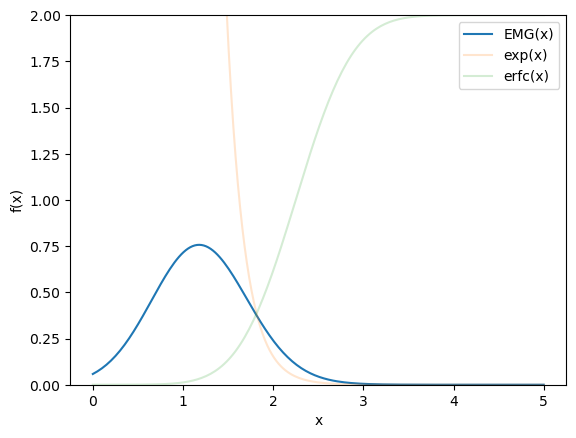

In [169]:
import numpy as np
from scipy import special
from matplotlib import pyplot as plt
from scipy.integrate import simpson

# set parameters
x = np.linspace(0,5,200)
mu = 1
sigma = 0.5
lmb = 5

# define exponentially modified Gaussian
def exp_normal_dist(x,mu,sigma,lmb):
    var = sigma**2
    return 0.5*lmb*np.exp(lmb/2*(2*mu+lmb*var - 2*x))*special.erfc((mu + lmb*var - x)/(np.sqrt(2)*sigma))

# Normalise function
f = exp_normal_dist(x,mu, sigma,lmb)
area = simpson(f,x)

norm_f = f/area

exp_func = np.exp(0.5*lmb*(2*mu + lmb*sigma**2 - 2*x))
erfc_func = special.erfc((mu + lmb*sigma**2 - x)/(np.sqrt(2)*sigma))

# plot
fig,ax = plt.subplots()
ax.plot(x, norm_f, label="EMG(x)")
ax.plot(x, exp_func, alpha = 0.2, label="exp(x)")
ax.plot(x, erfc_func, alpha = 0.2, label = "erfc(x)")
ax.set(xlabel="x", ylabel="f(x)", ylim=[0,2])
plt.legend()
plt.show()

Now consider the function scaled to the relevant astrophysical parameters, and plot alongside the distribution from PM04:

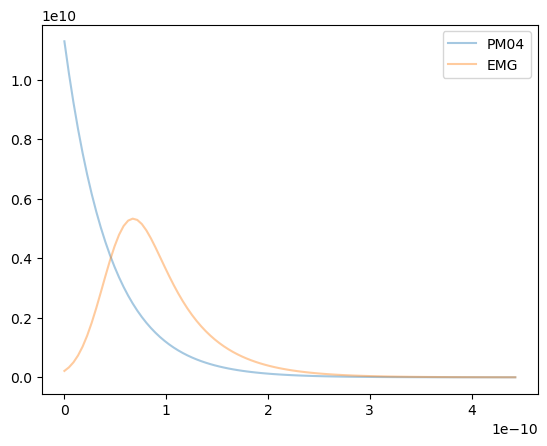

In [166]:
B_star = 1e8
R_star = 1e4
cs = 1e6
G = 6.67e-11
M_sol = 1.989e30
M_star = 1.4*M_sol
psi_star = B_star*R_star**2/2
ma = 1e-5*M_sol
x0 = cs**2*R_star/G/M_star
bratio = 10
psi_0 = np.sqrt(cs*cs*ma/x0**3)

psi_levels = np.linspace(0,1,100)*psi_star/psi_0

# EMG parameters
mu = psi_levels[10]
sigma = mu*0.5
lmb = 1/mu

dmdpsi_pm04 = 0.5*psi_0/psi_star*bratio*np.exp(-bratio*psi_levels*psi_0/psi_star)/(1.0 - np.exp(-bratio))
dmdpsi_emg = exp_normal_dist(psi_levels, mu,sigma, lmb)

# normalise EMG to match same area as PM04
norm_pm04 = simpson(dmdpsi_pm04)
norm_emg = simpson(dmdpsi_emg)

norm_dmdpsi_emg = dmdpsi_emg*norm_pm04/norm_emg

fig,ax = plt.subplots()
ax.plot(psi_levels, dmdpsi_pm04, alpha = 0.4, label="PM04")
ax.plot(psi_levels, norm_dmdpsi_emg, alpha = 0.4, label="EMG")
# ax.plot(psi_levels, exp_func, alpha = 0.2, label="exp(x)")
# ax.plot(psi_levels, erfc_func, alpha = 0.2, label = "erfc(x)")
# ax.plot(psi_levels, exp_func_2, alpha = 0.2, label="exp(x) 2")
plt.legend()
plt.show()
